In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/traffic_dataset.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [ ]:
import keras
from keras import models,layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import cv2
import pickle
import pandas as pd
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
count = 0
images = []
classNo=[]
no_categories = os.listdir('/content/Train/')
print("Total Classes Detected : ",len(no_categories))
noOfClasses=len(no_categories)
print("Importing Classes............")
for x in range(0,len(no_categories)):
  picList= os.listdir('/content/Train/'+str(count))
  for img in picList:
    curImg = cv2.imread('/content/Train/'+str(count)+'/'+img)
    image= Image.fromarray(curImg,'RGB')
    resize_img = image.resize((32,32))
    images.append(np.array(resize_img))
    classNo.append(count)
  print(count, end=" ")
  count +=1
print(" ")
images= np.array(images)
classNo = np.array(classNo)

print(images.shape, classNo.shape)

Total Classes Detected :  43
Importing Classes............
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
(39209, 32, 32, 3) (39209,)


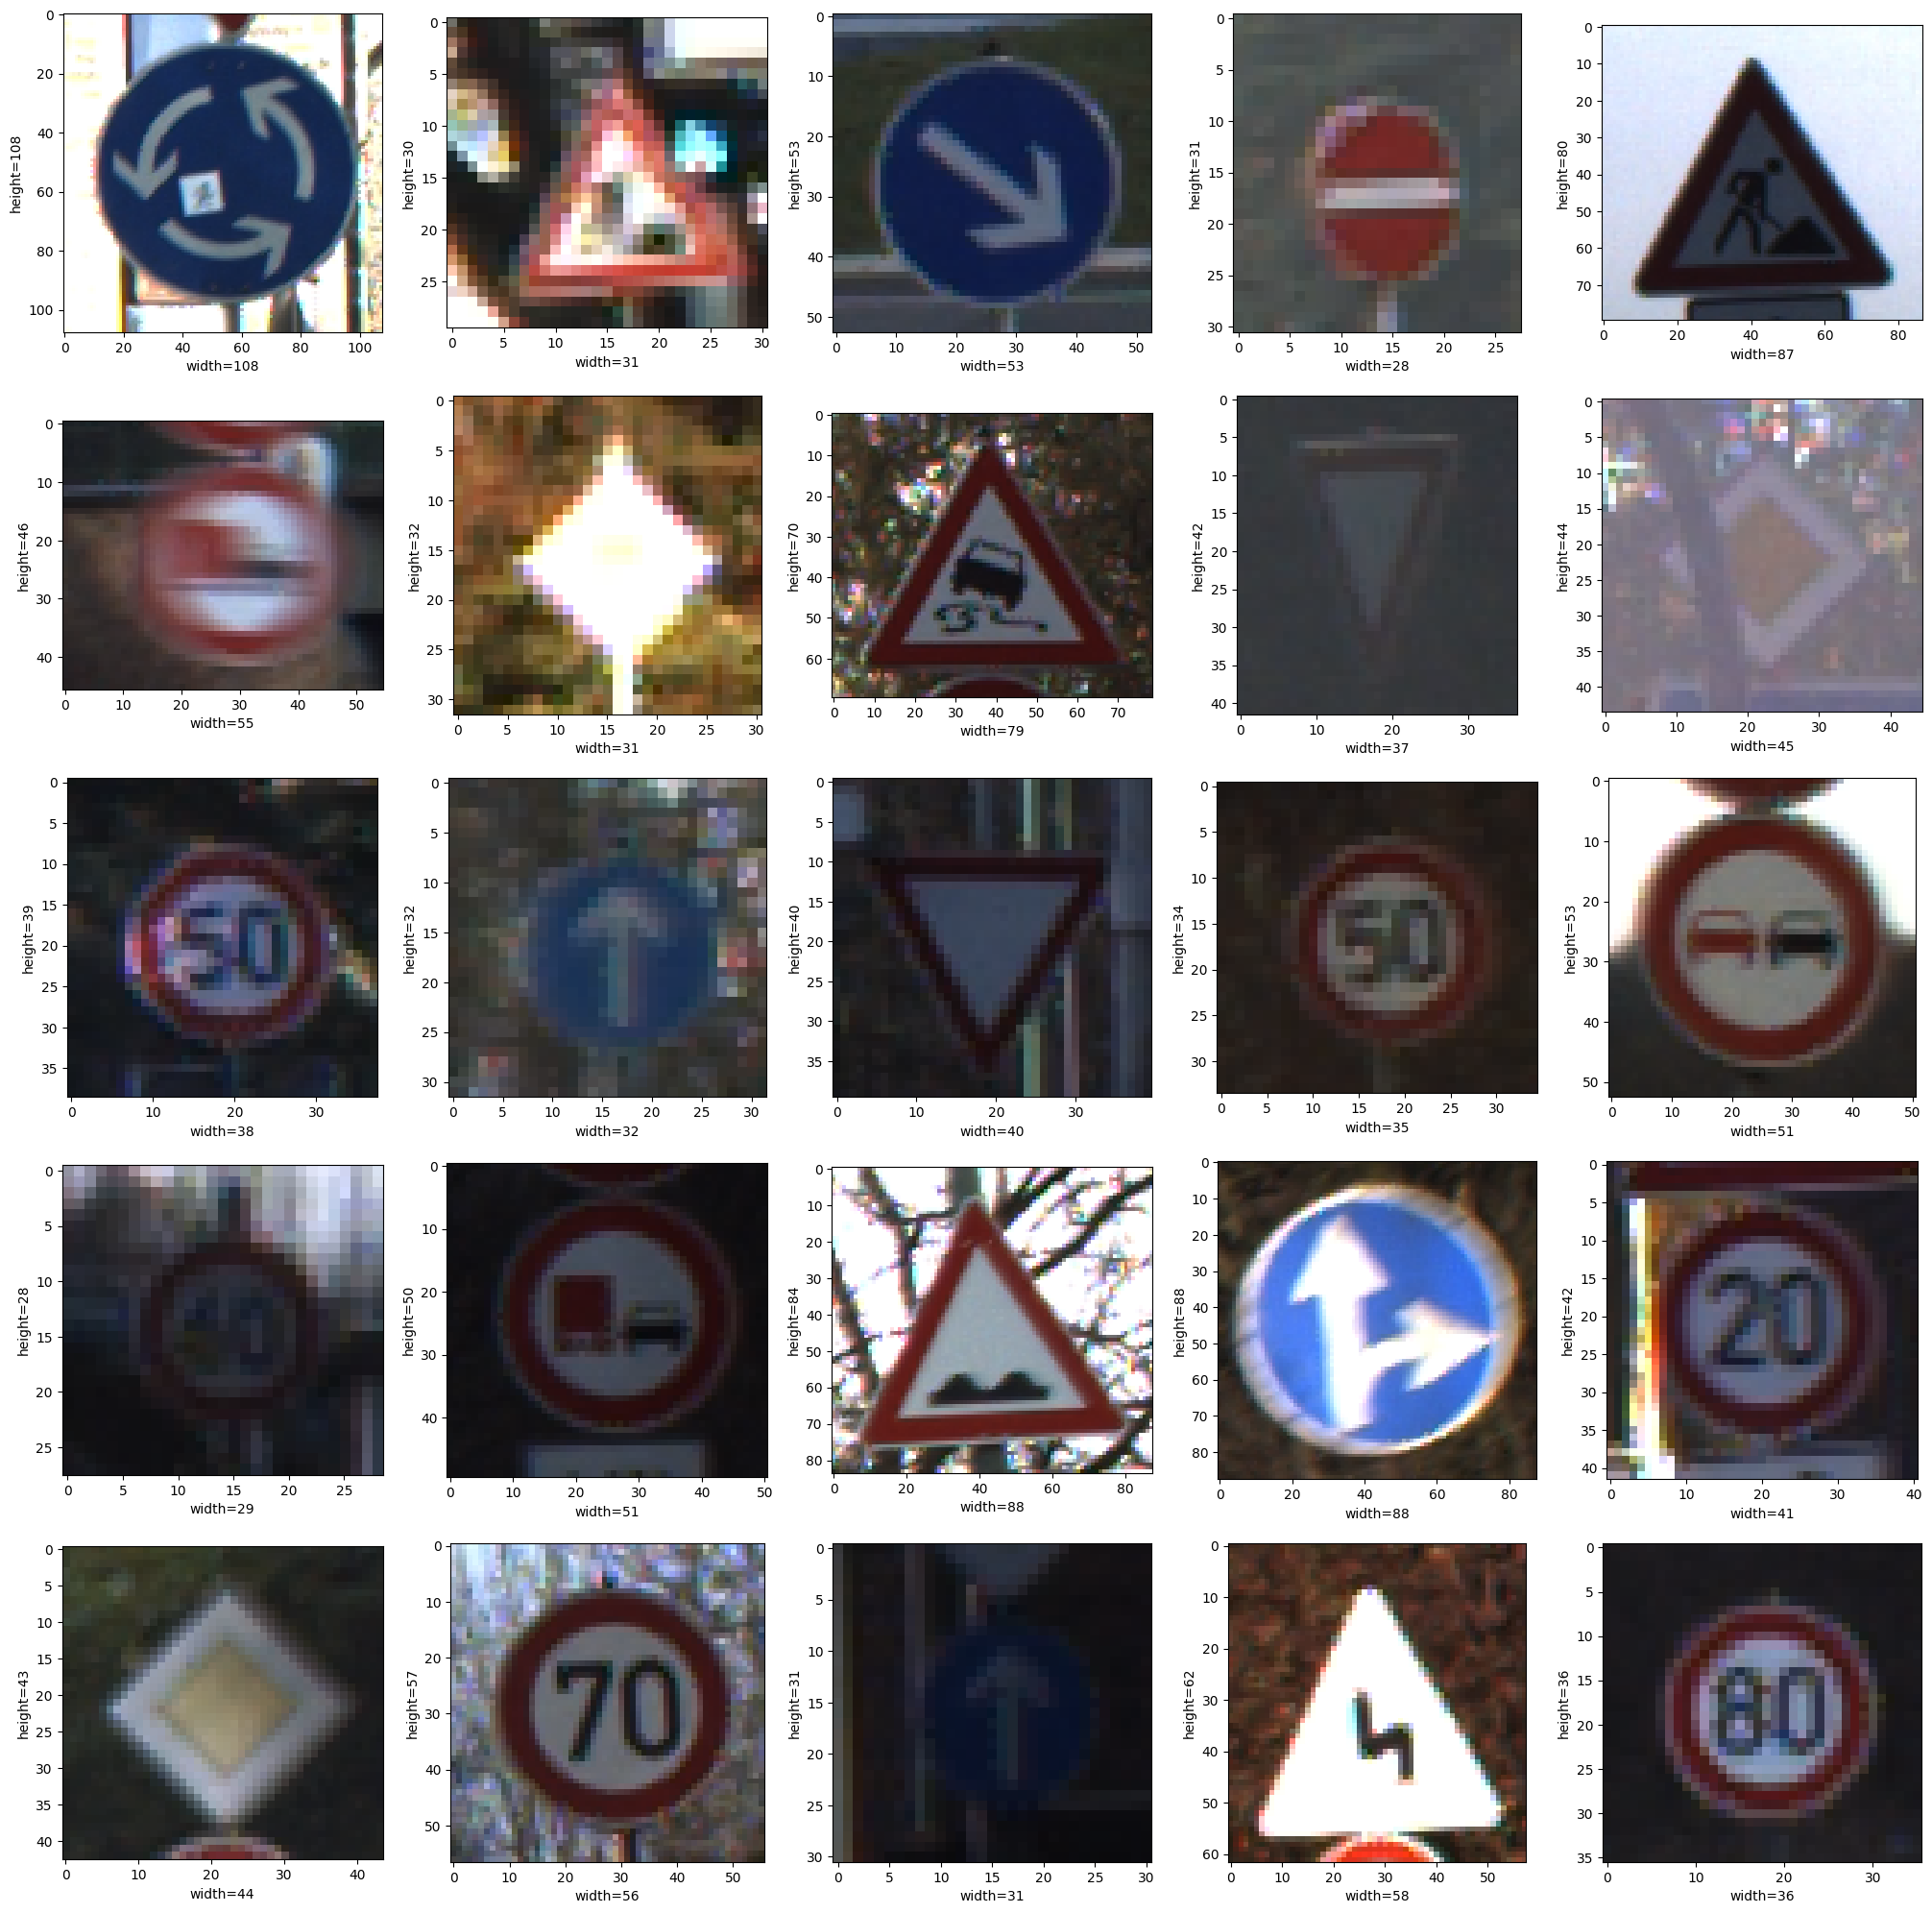

In [ ]:
import random
from matplotlib.image import imread

test = pd.read_csv('/content/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = '/content/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)

    plt.xlabel("width="+str(rand_img.shape[1]), fontsize = 10)#width of image
    plt.ylabel("height="+str(rand_img.shape[0]), fontsize = 10)#height of image

In [ ]:
x_train,x_val,y_train,y_val= train_test_split(images,classNo,test_size=0.3)
x_train = x_train/255
x_val = x_val/255
#x_train,x_validation,y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
print("training set: ",x_train.shape,y_train.shape)
print("Validation set: ",x_val.shape,y_val.shape)
#print("test set: ", x_test.shape, y_test.shape)

training set:  (27446, 32, 32, 3) (27446,)
Validation set:  (11763, 32, 32, 3) (11763,)


In [ ]:
y_train = keras.utils.to_categorical(y_train,len(no_categories))
y_val = keras.utils.to_categorical(y_val,len(no_categories))

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(axis=-1),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(axis=-1),

    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.5),

    layers.Dense(43,activation='softmax')
]
)
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_21 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_32 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 64)         

In [ ]:
model.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(lr=0.001),
    metrics= ["accuracy"]
)

In [ ]:
aug= ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.3,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.15,
    horizontal_flip= True,
    vertical_flip= True,
    fill_mode= 'nearest'
)

history = model.fit(aug.flow(x_train,y_train,batch_size = 64), epochs = 10, validation_data = (x_val,y_val))

Epoch 1/10
429/429 [==============================] - 18s 42ms/step - loss: 0.1461 - accuracy: 0.9499 - val_loss: 0.0619 - val_accuracy: 0.9787
Epoch 2/10
429/429 [==============================] - 19s 43ms/step - loss: 0.1391 - accuracy: 0.9516 - val_loss: 0.0664 - val_accuracy: 0.9748
Epoch 3/10
429/429 [==============================] - 18s 42ms/step - loss: 0.1342 - accuracy: 0.9525 - val_loss: 0.0644 - val_accuracy: 0.9784
Epoch 4/10
429/429 [==============================] - 20s 47ms/step - loss: 0.1408 - accuracy: 0.9517 - val_loss: 0.0659 - val_accuracy: 0.9780
Epoch 5/10
429/429 [==============================] - 18s 42ms/step - loss: 0.1297 - accuracy: 0.9553 - val_loss: 0.0725 - val_accuracy: 0.9783
Epoch 6/10
429/429 [==============================] - 20s 46ms/step - loss: 0.1225 - accuracy: 0.9586 - val_loss: 0.0805 - val_accuracy: 0.9747
Epoch 7/10
429/429 [==============================] - 20s 46ms/step - loss: 0.1245 - accuracy: 0.9579 - val_loss: 0.0685 - val_accuracy:

In [ ]:
model.save("traffic_model2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2 = models.load_model("/content/traffic_model.h5")

In [ ]:
test = pd.read_csv('/content/Test.csv')
labels=test["ClassId"].values
imgs = test["Path"].values

data =[]
plt.figure(figsize=(25,25))

for img in imgs:
    Img = cv2.imread('/content/'+img)
    image= Image.fromarray(Img,'RGB')
    resize_img = image.resize((32,32))
    data.append(np.array(resize_img))

x_test = np.array(data)
x_test = x_test/255



<Figure size 2500x2500 with 0 Axes>

In [ ]:
pred=np.argmax(model2.predict(x_test), axis=-1)
print("test data accuracy: ",accuracy_score(labels,pred)*100)

395/395 [==============================] - 16s 40ms/step
test data accuracy:  94.63182897862232


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        60
           1       0.97      1.00      0.99       720
           2       0.97      0.97      0.97       750
           3       0.94      0.94      0.94       450
           4       1.00      0.94      0.97       660
           5       0.89      0.97      0.93       630
           6       1.00      0.98      0.99       150
           7       1.00      0.92      0.96       450
           8       0.98      0.96      0.97       450
           9       0.99      1.00      1.00       480
          10       1.00      0.99      1.00       660
          11       0.97      0.99      0.98       420
          12       1.00      0.95      0.98       690
          13       0.96      0.99      0.98       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       0.99      1.00      0.99       150
          17       1.00    

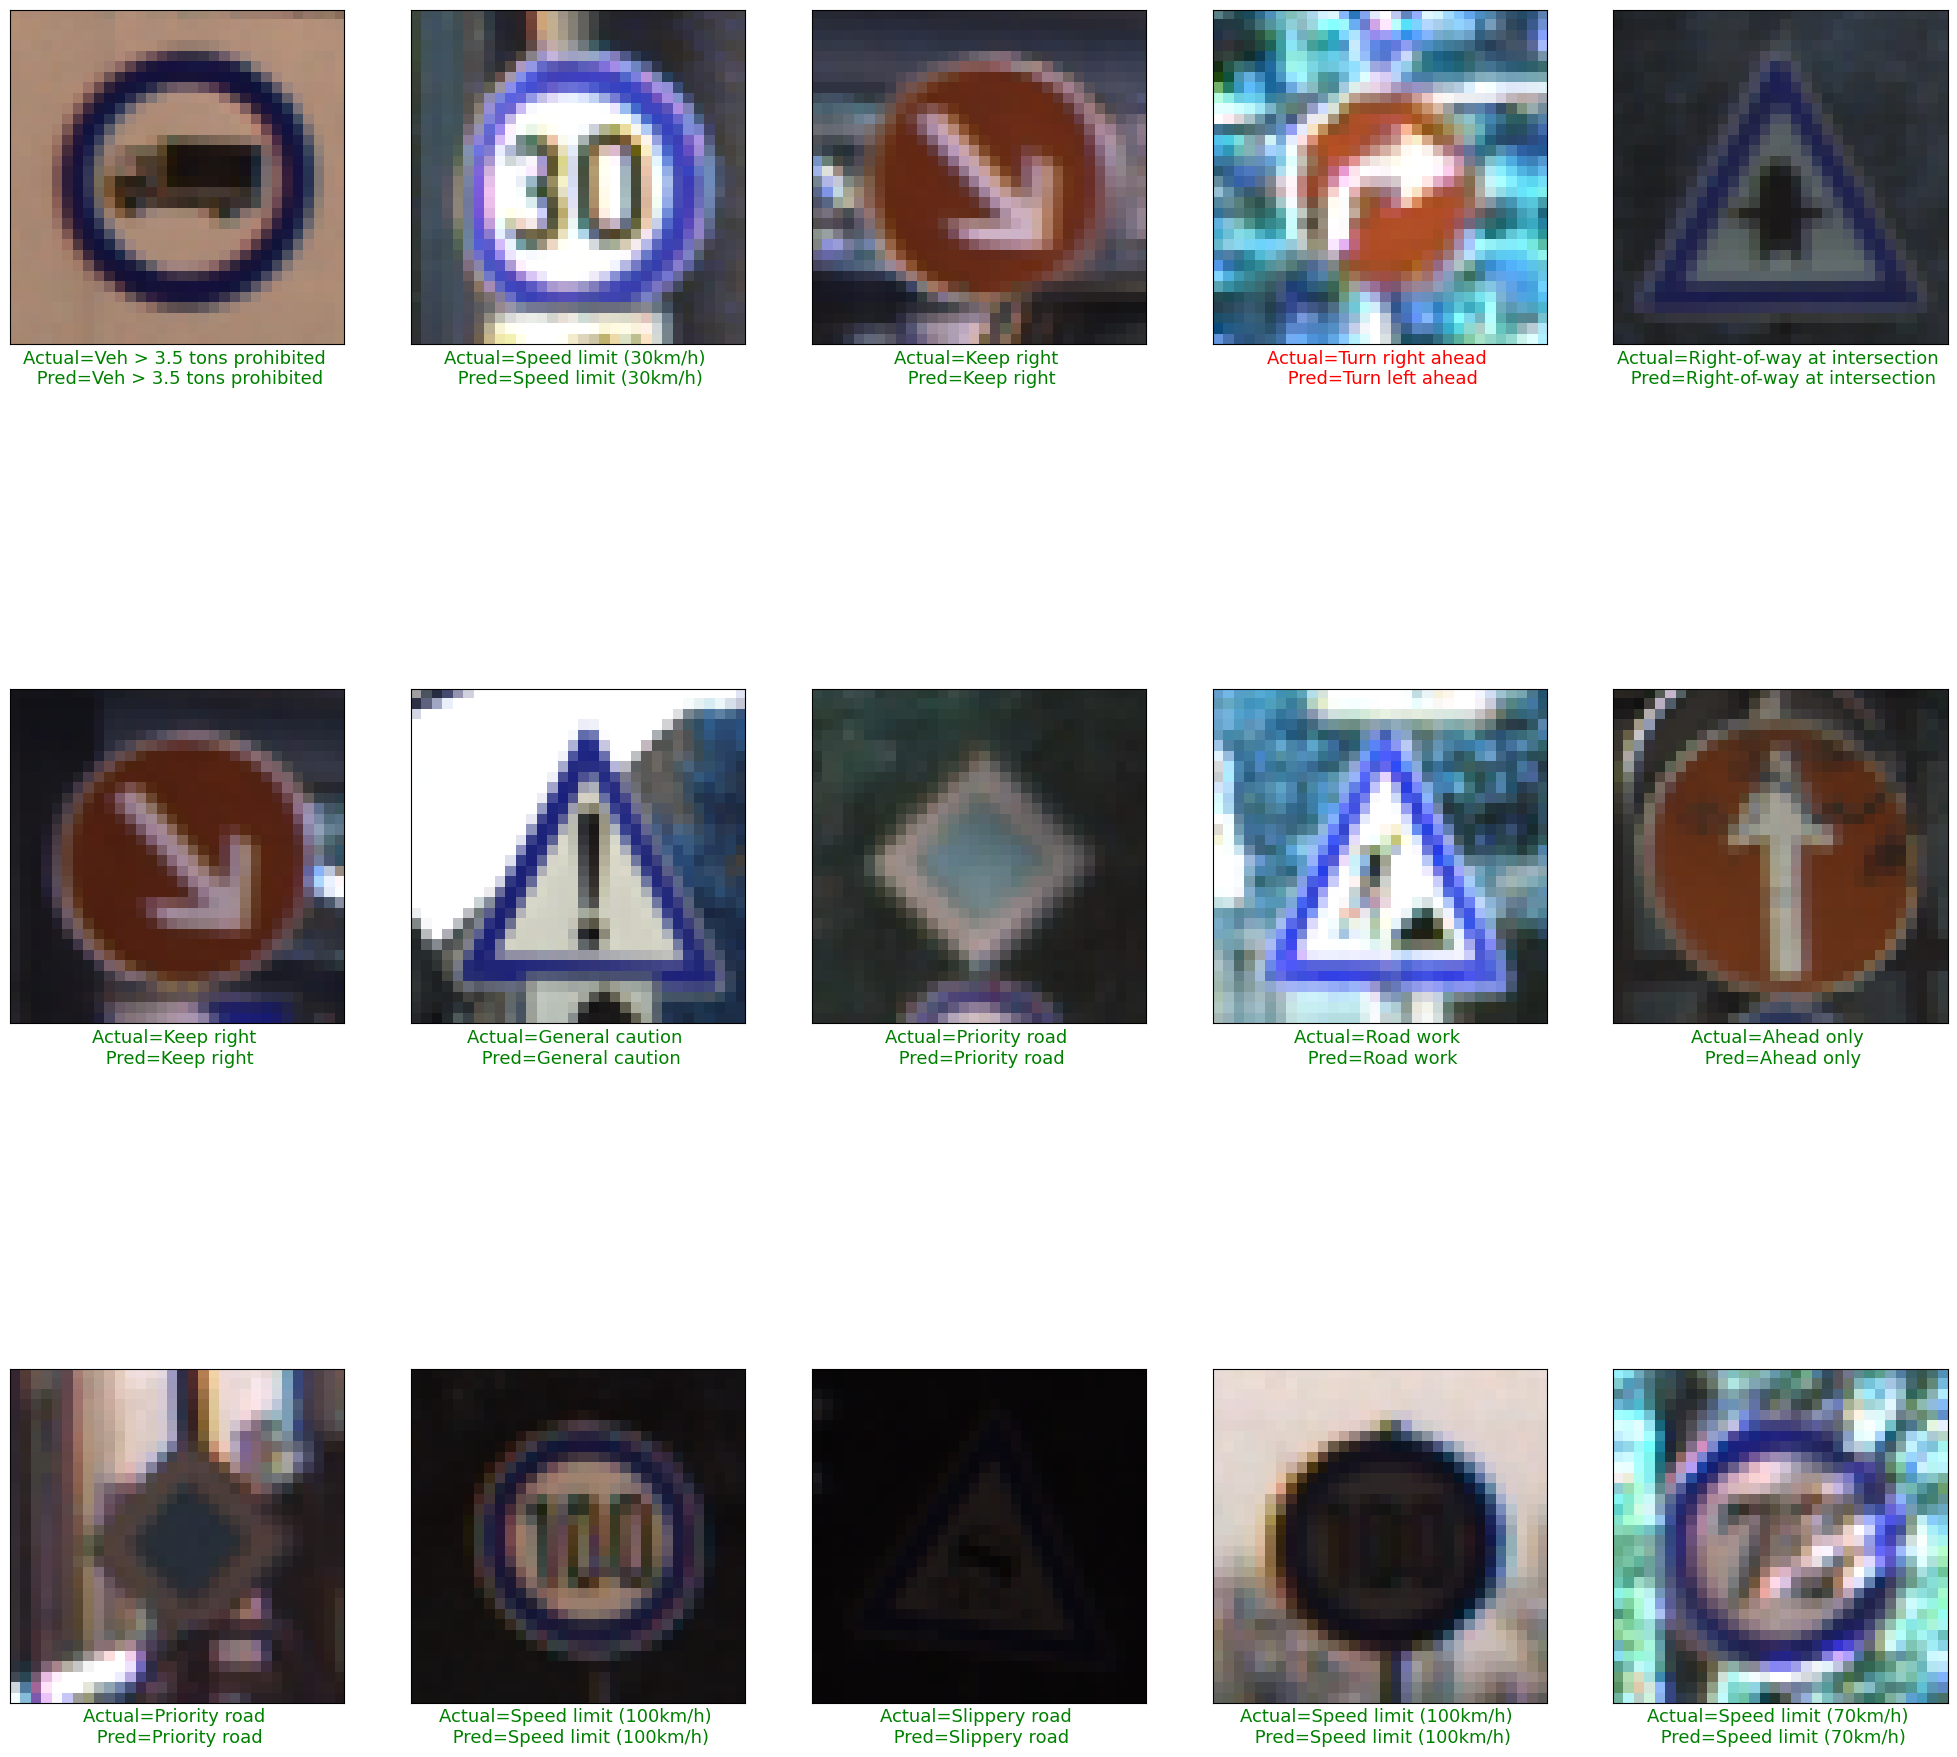

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(15):
    plt.subplot(3, 5, i+1 )
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes[pred[start_index + i]]
    actual = classes[labels[start_index + i]]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} \n Pred={}'.format(actual, prediction), color = col,fontsize=13)
    plt.imshow(x_test[start_index + i])
plt.show()

1/1 [==============================] - 0s 31ms/step


Text(0.5, 0, 'sign: No passing veh over 3.5 tons')

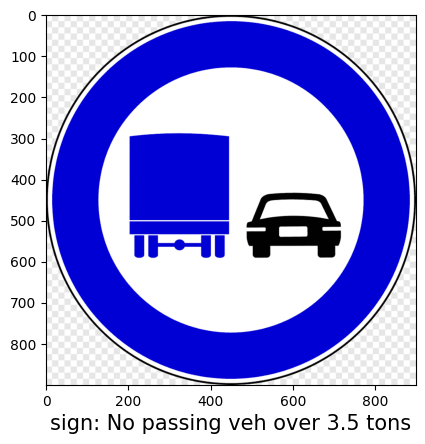

In [ ]:
path = '/content/4.png'
Img = cv2.imread(path)
image= Image.fromarray(Img,'RGB')
plt.imshow(image)
resize_img = image.resize((32,32))
img = np.array(resize_img)
img = img/255
image_data = tf.expand_dims(img, axis=0)
pred=np.argmax(model2.predict(image_data), axis=-1)
plt.xlabel("sign: "+classes[pred[0]],fontsize=15)

1/1 [==============================] - 0s 25ms/step
Stop
